<ipython-input-1-8bcfadf7c4f1>:8: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  sig = np.mean(estimate_sigma(img, multichannel=True))
<ipython-input-1-8bcfadf7c4f1>:9: FutureWarning: `multichannel` is a deprecated argument name for `denoise_nl_means`. It will be removed in version 1.0. Please use `channel_axis` instead.
  denoise = denoise_nl_means(img, h=1.15 * sig, fast_mode=True, patch_size=5, patch_distance=3, multichannel=True)


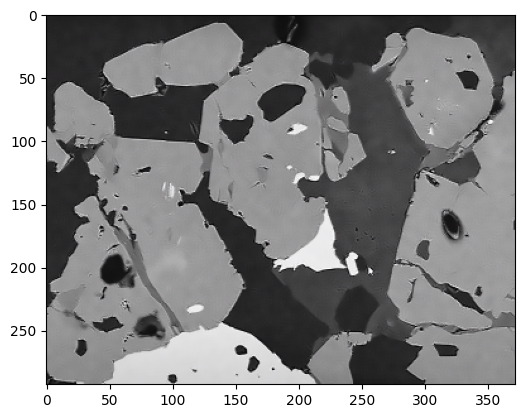

In [1]:
from skimage.restoration import denoise_nl_means, estimate_sigma
from skimage import img_as_float, img_as_ubyte, io
import numpy as np
from matplotlib import pyplot as plt

img = img_as_float(io.imread("/content/noisy2.png"))

sig = np.mean(estimate_sigma(img, multichannel=True))
denoise = denoise_nl_means(img, h=1.15 * sig, fast_mode=True, patch_size=5, patch_distance=3, multichannel=True)

denub = img_as_ubyte(denoise)
plt.imshow(denub, cmap='gray')

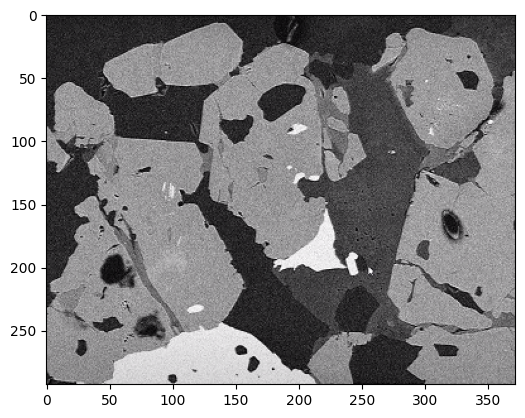

In [2]:
plt.imshow(img)

(array([  99.,   48.,   50.,   40.,    0.,   40.,   54.,   65.,   71.,
           0.,   60.,   72.,   99.,  103.,    0.,  115.,  123.,  123.,
         154.,    0.,  227.,  380.,  494.,  578.,    0.,  534.,  600.,
         469.,  412.,    0.,  375.,  403.,  394.,  388.,    0.,  424.,
         488.,  537.,  707.,    0., 1003., 1505., 2260., 2930.,    0.,
        3845., 5178., 6903., 8644.,    0., 9635., 8951., 7398., 5079.,
           0., 3107., 1803., 1287., 1017.,    0.,  800.,  658.,  644.,
         594.,    0.,  604.,  557.,  574.,  561.,    0.,  663.,  663.,
         698.,  783.,    0.,  952., 1188., 1507., 1945.,    0., 2280.,
        2406., 2409., 2599.,    0., 2708., 2709., 2930., 2835.,    0.,
        2748., 2274., 1897., 1531.,    0., 1268., 1066.,  880.,  711.,
         531.]),
 array([ 0. ,  0.8,  1.6,  2.4,  3.2,  4. ,  4.8,  5.6,  6.4,  7.2,  8. ,
         8.8,  9.6, 10.4, 11.2, 12. , 12.8, 13.6, 14.4, 15.2, 16. , 16.8,
        17.6, 18.4, 19.2, 20. , 20.8, 21.6, 22.4, 23.2

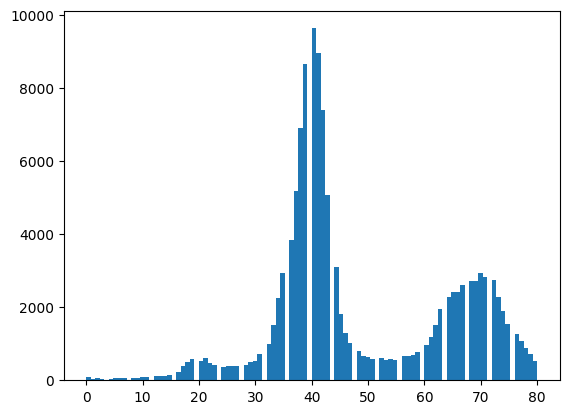

In [4]:
plt.hist(denub.flat, bins=100, range=(0,80))

In [12]:
seg = (denub <= 55)
seg1 = (denub >55) & (denub <=110)
seg2 = (denub >110) & (denub <=210)
seg3 = (denub >210)

allseg = np.zeros((denub.shape[0], denub.shape[1], 3))
allseg[seg] = (1,0,0)
allseg[seg1] = (0,1,0)
allseg[seg2] = (0,0,1)
allseg[seg3] = (1,1,0)
plt.imshow(allseg)

IndexError: ignored

In [20]:
from scipy import ndimage as nd

seg_op = nd.binary_opening(seg, np.ones((3,3,3)))
seg_cl = nd.binary_closing(seg_op, np.ones((3,3,3)))

seg1_op = nd.binary_opening(seg1, np.ones((3,3,3)))
seg1_cl = nd.binary_closing(seg1_op, np.ones((3,3,3)))

seg2_op = nd.binary_opening(seg2, np.ones((3,3,3)))
seg2_cl = nd.binary_closing(seg2_op, np.ones((3,3,3)))

seg3_op = nd.binary_opening(seg3, np.ones((3,3,3)))
seg3_cl = nd.binary_closing(seg3_op, np.ones((3,3,3)))

allsegcl = np.zeros((denub.shape[0], denub.shape[1], 4))

allsegcl[seg_cl] = (1,0,0)
allsegcl[seg1_cl] = (0,1,0)
allsegcl[seg2_cl] = (0,0,1)
allsegcl[seg3_cl] = (1,1,0)
plt.imshow(allsegcl)

ValueError: ignored